In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

books = pd.read_csv('BX-Books.csv', sep =';',
                   error_bad_lines = False, encoding = "latin-1")
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']

users = pd.read_csv('BX-Users.csv',sep=';',error_bad_lines = False,
                   encoding = 'latin-1')
users.columns = ['UserID','Location','Age']

ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines = False, encoding = "latin-1")
ratings.columns = ['UserId','ISBN','bookRating']




b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [2]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserId', 'ISBN', 'bookRating']


In [3]:
ratings.head()
ratings.bookRating.value_counts(sort = False)

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: bookRating, dtype: int64

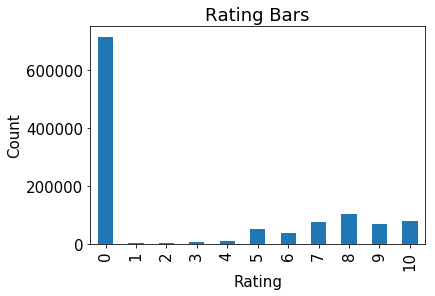

In [4]:
# Plotting Ratings

plt.rc("font", size = 15)
ratings.bookRating.value_counts(sort = False).plot(kind = 'bar')
plt.title('Rating Bars')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('Rating_Count.png',bbox_inches = 'tight')
plt.show()

In [5]:
books.shape
list(books.columns)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.shape
list(users.columns)
users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


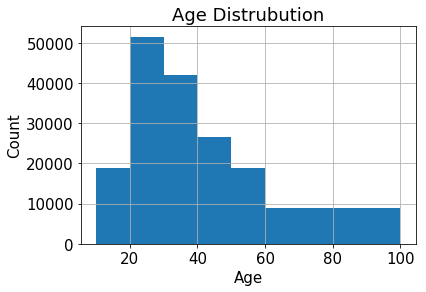

In [7]:
# Age Distribution
users.Age.hist(bins = [10,20,30,40,50,60,100])
plt.title('Age Distrubution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('User_distribution.png',bbox_inches='tight')
plt.show()

In [8]:
# Finding Books with most Ratings

rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating',ascending=False).head()
# These books have recieved the highest rating counts
            # ISBN - 0971880107
            # ISBN - 0316666343
            # ISBN - 0385504209
            # ISBN - 0060928336
            # ISBN - 0312195516

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [9]:
most_rated = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],index = np.arange(0,5),columns=['ISBN'])
most_rated_merge = pd.merge(books,most_rated,on = ['ISBN'])
most_rated_merge

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
3,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


These books have the highest counts of Ratings. Next we will check whether these books are rated highest or not.

In [10]:
average_ratings = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_ratings['rating_count'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_ratings.sort_values('rating_count',ascending=False).head()

,bookRating,rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Here we can see that the books that have the highest rating counts dont have good ratings. So we cannot recommend them to users.

#### To get good results, we are excluding users with less than 200 ratings and books with less than 100 ratings

In [41]:
user_count = ratings['UserId'].value_counts()
ratings = ratings[ratings['UserId'].isin(user_count[user_count >= 200].index)]
book_count = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(book_count[book_count >= 100].index)]

In [43]:
ratings.shape

(527556, 3)

Now Converting Ratings into a 2D Matrix

In [46]:
ratings_pivot = ratings.pivot(index = 'UserId',columns = 'ISBN').bookRating
UserId = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
UserId,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now finding books similar to The Lovely Bones: A Novel

In [48]:
bones_rating = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_rating)
corr_bones = pd.DataFrame(similar_to_bones, columns = ['Pearson'])
corr_bones.dropna(inplace = True)
corr_summary = corr_bones.join(average_ratings['rating_count'])
corr_summary[corr_summary['rating_count'] >= 300].sort_values('Pearson',ascending = False).head(10)

/home/shiva/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


,Pearson,rating_count
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


We have the ISBN's of the books which are similar to The Lovely Bones.
We just need to find out their titles.

In [54]:
similar = pd.DataFrame(['0312291639','0316601950','0446610038','0446672211','0385265700','0345342968','0060930535','0375707972','0684872153'],index = np.arange(9),columns=['ISBN'])
similar_books = pd.merge(books,similar,on = 'ISBN')
similar_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
1,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
2,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
3,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
5,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
6,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
7,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
8,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...


### Hence, we have found the books similar to the book 'The Lovely Bones' using Pearson Correlation.